# Problem statement:


Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"



## 1. Introduction:<a class="anchor" id="1"></a>
### What is a Decision Tree?
+ #### Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
+ #### In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
+ #### The decisions or the test are performed on the basis of features of the given dataset.
+ #### It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
+ #### It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
+ #### In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
+ #### A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
import statsmodels.api as sm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Import Dataset

In [2]:
data = pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Decision%20Tree/Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# 2. About Dataset

Data Description :

  + Undergrad : person is under graduated or not
  + Marital.Status : marital status of a person
  + Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
  + Work Experience : Work experience of an individual person
  + Urban : Whether that person belongs to urban area or not

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# 3. Descriptive Analysis

In [4]:
data.shape

(600, 6)

In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


The features are not on the same scale.  For example City.Population has a mean of 108747.36 while Work.Experience has a mean value of 15.55.  Features should be on the same scale for algorithms such as logistic regression(gradient descent) to converge smoothly.

In [6]:
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


# 4. Data Exploration

Befor doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [7]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
newdata = pd.DataFrame(data)
newdata

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [9]:
data= newdata.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income' : 'taxable_income', 'City.Population' :'city_population', 'Work.Experience':'work_ex'}, inplace= True)

In [10]:
newdata

,Undergrad,marital_status,taxable_income,city_population,work_ex,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


Convert Target Variable to Categorical Variable

# Let's assume : taxable_income <= 30000 as 'Risky=0' and others are 'Good = 1'

In [11]:
newdata['tax_status'] = np.where(newdata['taxable_income']<=30000, 'Risky', 'Good')

In [12]:
newdata.head()

,Undergrad,marital_status,taxable_income,city_population,work_ex,Urban,tax_status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [13]:
newdata.tax_status.unique()

array(['Good', 'Risky'], dtype=object)

In [14]:
newdata.drop(['taxable_income', 'city_population'], axis=1, inplace=True)
newdata

,Undergrad,marital_status,work_ex,Urban,tax_status
0,NO,Single,10,YES,Good
1,YES,Divorced,18,YES,Good
2,NO,Married,30,YES,Good
3,YES,Single,15,YES,Good
4,NO,Married,28,NO,Good
...,...,...,...,...,...
595,YES,Divorced,7,YES,Good
596,YES,Divorced,2,YES,Good
597,NO,Divorced,0,YES,Good
598,YES,Married,17,NO,Good


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label = LabelEncoder()

In [17]:
newdata['Undergrad'] = label.fit_transform(newdata['Undergrad'])
newdata['marital_status'] = label.fit_transform(newdata['marital_status'])
newdata['Urban'] = label.fit_transform(newdata['Urban'])

In [19]:
newdata.head()

,Undergrad,marital_status,work_ex,Urban,tax_status
0,0,2,10,1,Good
1,1,0,18,1,Good
2,0,1,30,1,Good
3,1,2,15,1,Good
4,0,1,28,0,Good


In [18]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    int64 
 1   marital_status  600 non-null    int64 
 2   work_ex         600 non-null    int64 
 3   Urban           600 non-null    int64 
 4   tax_status      600 non-null    object
dtypes: int64(4), object(1)
memory usage: 23.6+ KB


In [20]:
X = newdata.iloc[:,:4]
X

,Undergrad,marital_status,work_ex,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [21]:
Y = newdata.iloc[:,-1]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_status, Length: 600, dtype: object

In [22]:
newdata.tax_status.value_counts()

Good     476
Risky    124
Name: tax_status, dtype: int64

Building Decision Tree Classifier using Entropy Criteria

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=40)

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [26]:
model.get_n_leaves()

7

In [27]:
preds = model.predict(X_test)
pd.Series(preds).value_counts()

Good    120
dtype: int64

In [28]:
# Accuracy
np.mean(preds==Y_test)

0.7666666666666667

Building Decision Tree Classifier



#### Post pruning decision trees with cost complexity pruning
.. currentmodule:: sklearn.tree

The :class:`DecisionTreeClassifier` provides parameters such as `min_samples_leaf` and `max_depth` to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In :class:`DecisionTreeClassifier`, this pruning technique is parameterized by the cost complexity parameter, `ccp_alpha`. Greater values of `ccp_alpha` increase the number of nodes pruned. Here we only show the effect of `ccp_alpha` on regularizing the trees and how to choose a `ccp_alpha` based on validation scores.

See also `minimal_cost_complexity_pruning` for details on pruning.

#### 1. Information Gain:
+ Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
+ It calculates how much information a feature provides us about a class.
+ According to the value of information gain, we split the node and build the decision tree.
+ A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:

**`Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature) `**
![image.png](attachment:image.png)

#### Entropy
+ Entropy is nothing but the uncertainty in our dataset or measure of disorder. Let me try to explain this with the help of an example.
+ Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as:
![image.png](attachment:image.png)
Intuitively, it tells us about the predictability of a certain event. Example, consider a coin toss whose probability of heads is 0.5 and probability of tails is 0.5. Here the entropy is the highest possible, since there’s no way of determining what the outcome might be. Alternatively, consider a coin which has heads on both the sides, the entropy of such an event can be predicted perfectly since we know beforehand that it’ll always be heads. In other words, this event has no randomness hence it’s entropy is zero. In particular, lower values imply less uncertainty while higher values imply high uncertainty.

In [29]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [33]:
# Install the required module
!pip install scikit-learn

# Import the necessary module
from sklearn.tree import DecisionTreeClassifier

# Code using the imported module will now work

In [36]:
from sklearn.tree import plot_tree

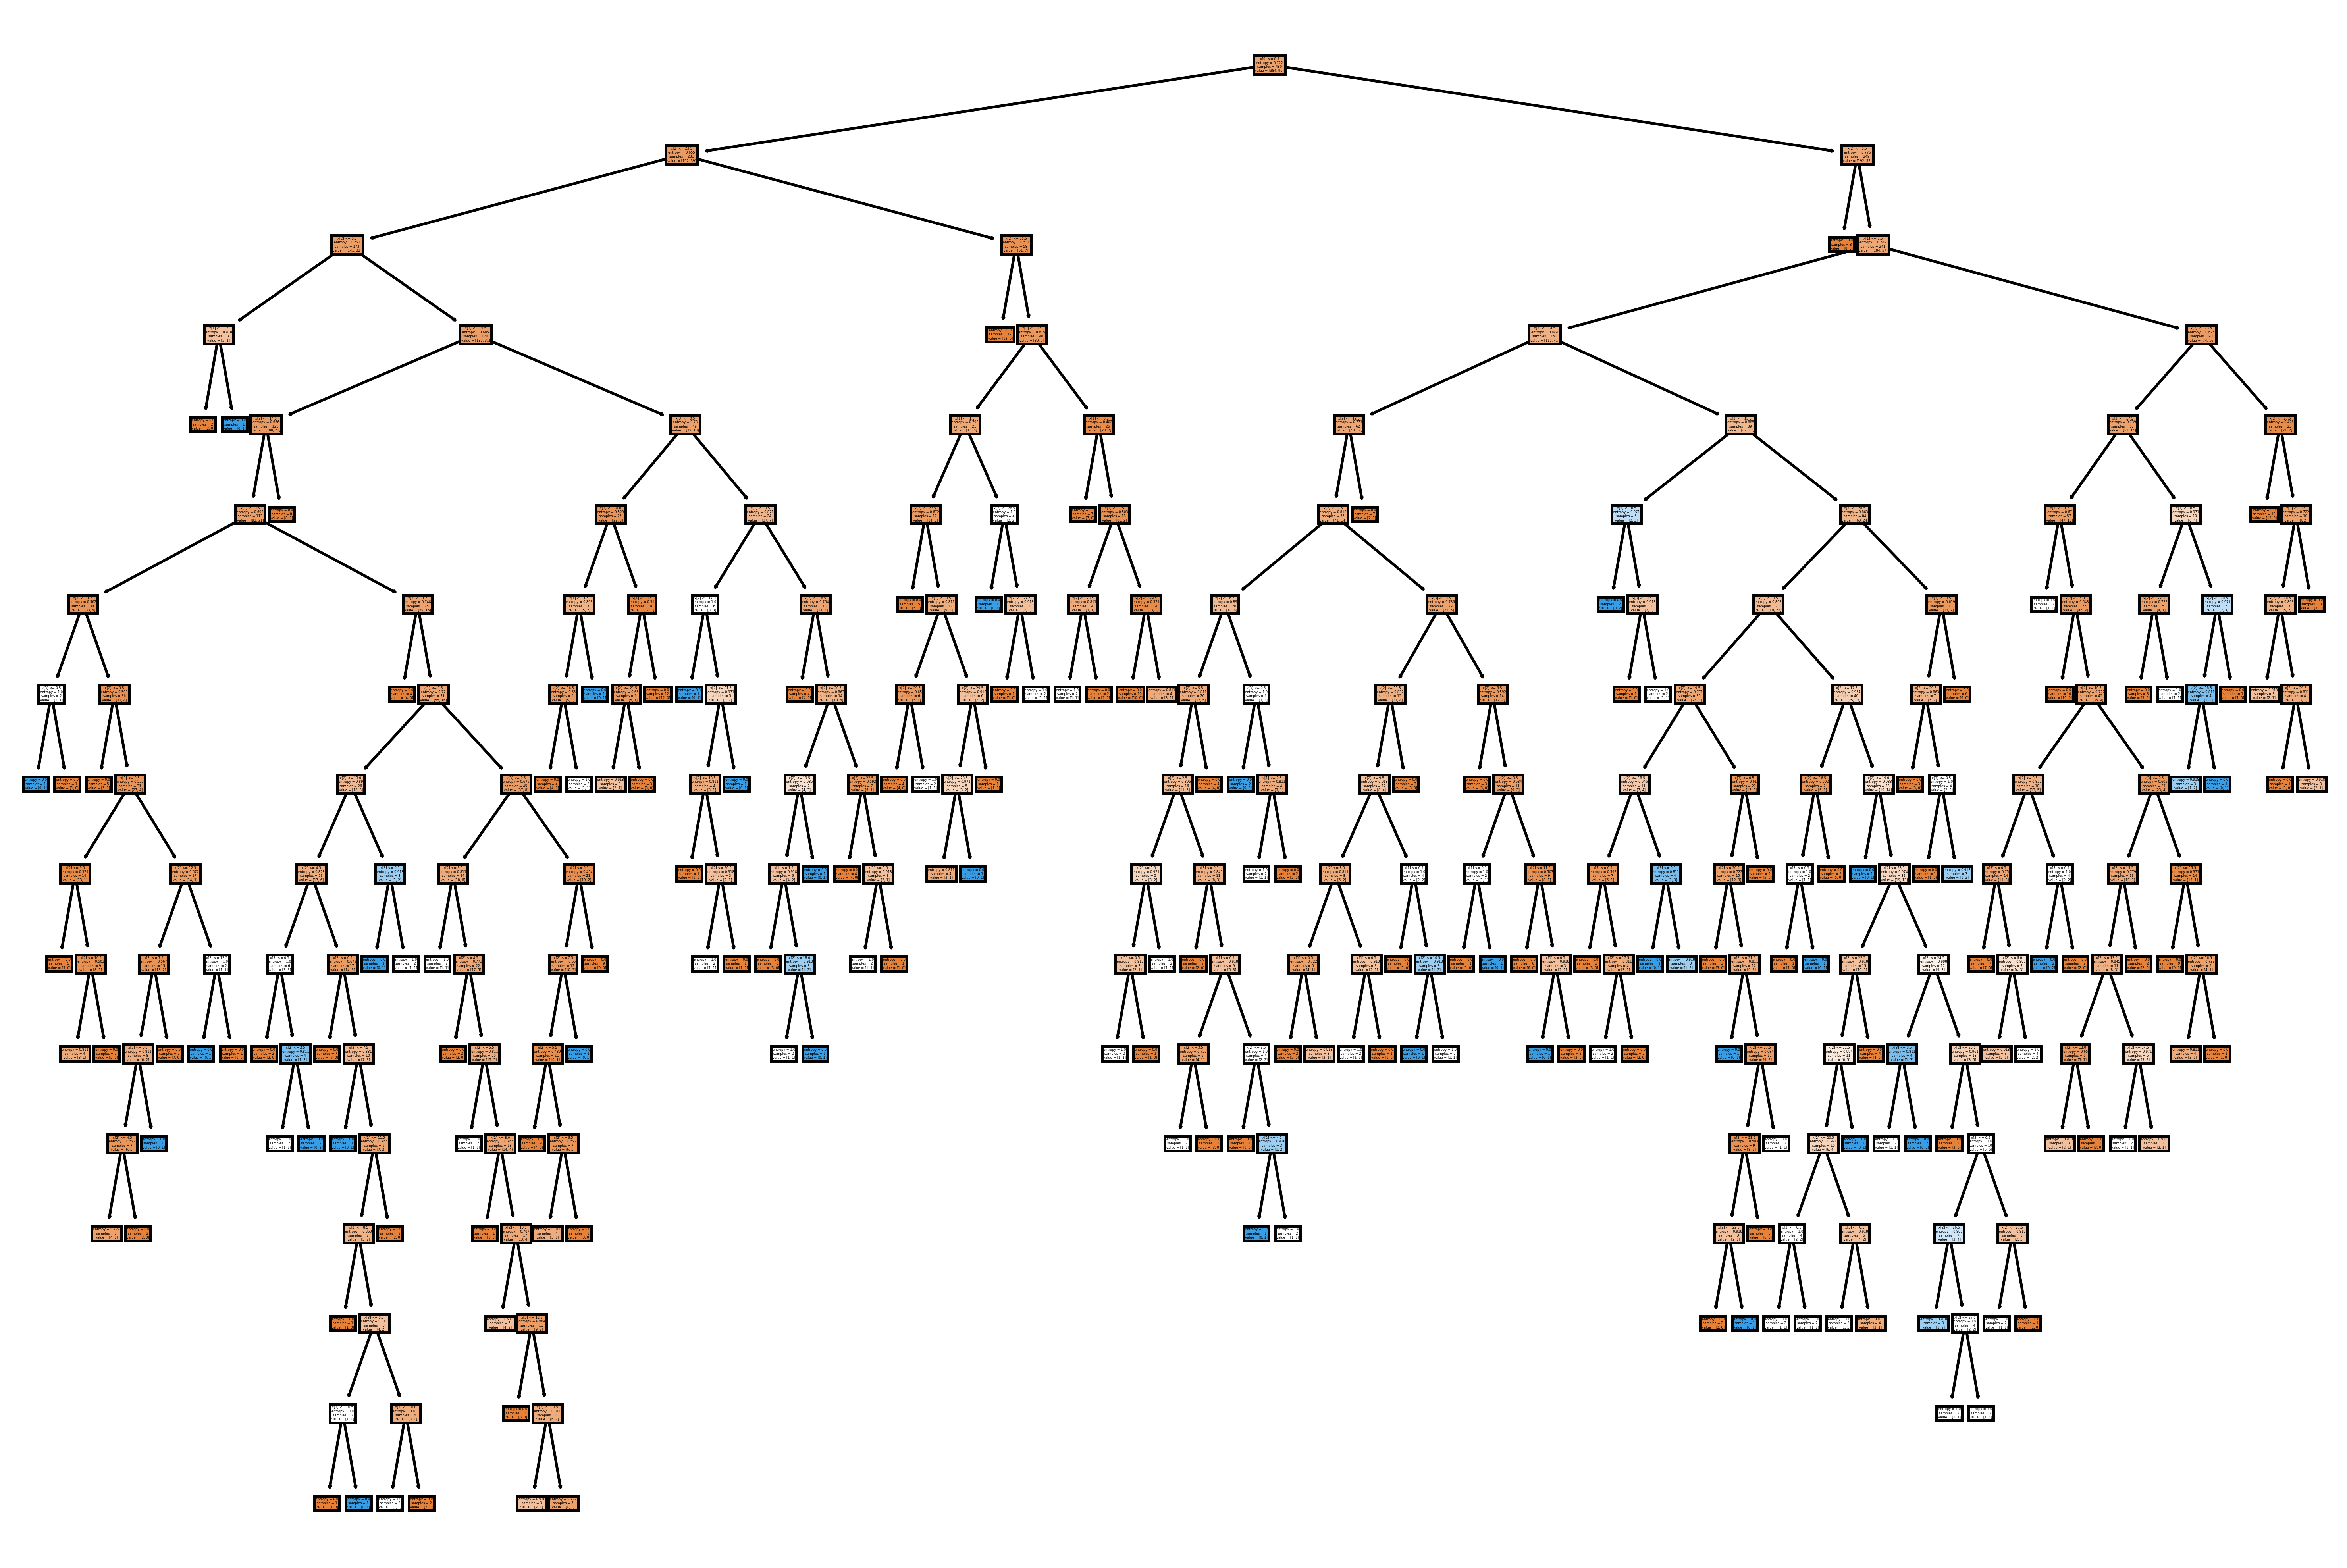

In [37]:
plt.figure(figsize=(15,10), dpi=500)
plot_tree(model_entropy, filled=True)
plt.show()

In [39]:
preds =model_entropy.predict(X_test)
pd.Series(preds).value_counts()

Good     103
Risky     17
dtype: int64

In [40]:
pd.crosstab(Y_test, preds)

col_0,Good,Risky
tax_status,,
Good,79,13
Risky,24,4


In [42]:
np.mean(preds==Y_test)

0.6916666666666667

In [45]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

        Good       0.77      0.86      0.81        92
       Risky       0.24      0.14      0.18        28

    accuracy                           0.69       120
   macro avg       0.50      0.50      0.49       120
weighted avg       0.64      0.69      0.66       120



In [47]:
path = model_entropy.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [49]:
clfs = []
for ccp_alpha in ccp_alphas:
     clf = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha= ccp_alpha)
     clf.fit(X_train, Y_train)
     clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clf.tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0052278586910144975


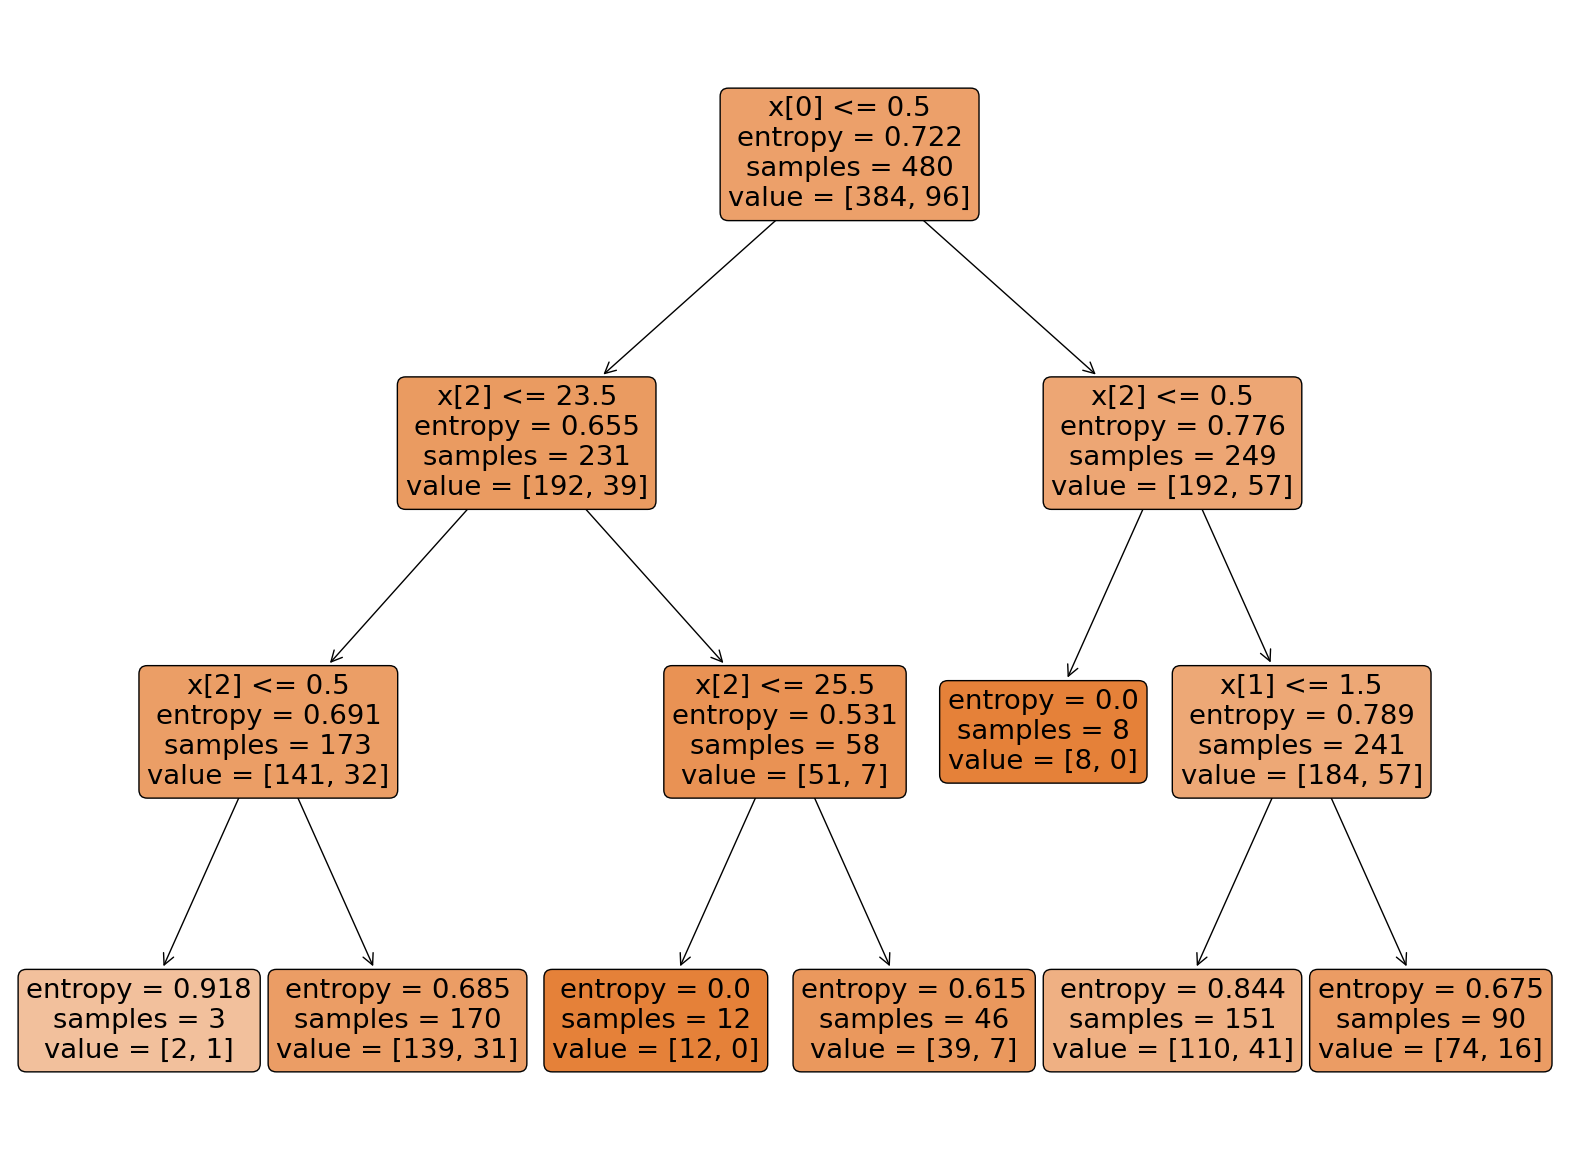

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
plot_tree = plot_tree(model, rounded=True, filled=True)
plt.show()

Building Decision Tree Classifier (CART) using Gini Criteria

## 9. Advantages of CART<a class="anchor" id="9"></a>
+ ### Simple to understand, interpret, visualize.
+ ### Decision trees implicitly perform variable screening or feature selection.
+ ### Can handle both numerical and categorical data. Can also handle multi-output problems.
+ ### Decision trees require relatively little effort from users for data preparation.
+ ### Nonlinear relationships between parameters do not affect tree performance
+ ### It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
+ ### It can be very useful for solving decision-related problems.
+ ### It helps to think about all the possible outcomes for a problem.

## 10. Disadvantages of CART<a class="anchor" id="10"></a>
+ ### Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting.
+ ### Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.
+ ### Greedy algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees, where the features and samples are randomly sampled with replacement.
+ ### Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the data set prior to fitting with the decision tree.
+ ### It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
+ ### For more class labels, the computational complexity of the decision tree may increase.